##Predict Clicked Ads Customer Classification by Using Machine Learning
Tujuan dari pembuatan model ini adalah untuk memprediksi siapa yang akan mengklik ads agar marketing team bisa menargetkan potensial customer yang tepat untuk meningkatkan profit dan mengurangi potensi kerugian.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

###Check Dataset

In [ ]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('/content/drive/MyDrive/JGP/week 4/Clicked Ads Dataset.csv')
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


Terminologi:
- daily time spent on site: waktu customer browsing dalam sehari
- age: umur
- area income: penghasilan
- daily internet usage: kuota internet yang digunakan dalam sehari
- male: jenis kelamin
- timestamp: waktu browsing terakhir yang tercatat
- clicked on ad: klik ads atau tidak
- city: kota
- province: provinsi
- category: kategori yang dicari

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed: 0                1000 non-null   int64  
 1   daily time spent on site  987 non-null    float64
 2   age                       1000 non-null   int64  
 3   area income               987 non-null    float64
 4   daily internet usage      989 non-null    float64
 5   male                      997 non-null    object 
 6   timestamp                 1000 non-null   object 
 7   clicked on ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.drop(columns=['unnamed: 0'],axis=1,inplace=True)

#EDA

In [ ]:
df1 = df.copy()

df1.rename(columns={'male':'gender'},inplace=True)
df1.nunique()

daily time spent on site    890
age                          43
area income                 987
daily internet usage        955
gender                        2
timestamp                   997
clicked on ad                 2
city                         30
province                     16
category                     10
dtype: int64

In [ ]:
#cek missing values
df1.isna().sum()

daily time spent on site    13
age                          0
area income                 13
daily internet usage        11
gender                       3
timestamp                    0
clicked on ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
#Drop row with missing values in gender feature
'''
Karena jumlah missing values sangat sedikit dan
gender adalah fitur kategorikal, maka baris yang mengandung
missing values tersebut dibuang.
'''
df1.dropna(subset=['gender'],how='any',axis=0,inplace=True)

In [ ]:
kat = df1.select_dtypes(include = ['object'])
num = df1.select_dtypes(exclude = ['object'])

In [ ]:
kat = kat.drop(columns=['timestamp'],axis=1)

In [ ]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [ ]:
kat1 = kat.columns.tolist()
num1 = num.columns.tolist()

print(len(kat1))
print(len(num1))

5
4


###Univariate

####Numerikal

In [ ]:
num.describe()

,daily time spent on site,age,area income,daily internet usage
count,984.000000,997.000000,9.850000e+02,986.000000
mean,64.902419,36.039117,3.849395e+08,179.889128
std,15.843017,8.779396,9.415631e+07,43.918593
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.147500,29.000000,3.287488e+08,138.687500
50%,68.105000,35.000000,3.991039e+08,182.650000
75%,78.380000,42.000000,4.584775e+08,218.797500
max,91.430000,61.000000,5.563936e+08,267.010000


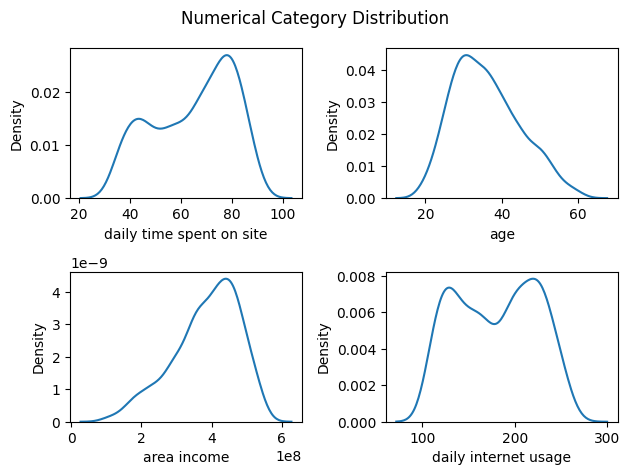

In [ ]:
#cek persebaran data
for i in range(0,len(num1)):
  plt.subplot(2,2,i+1)
  sns.kdeplot(df1[num1[i]])
  plt.tight_layout()
  plt.suptitle('Numerical Category Distribution')

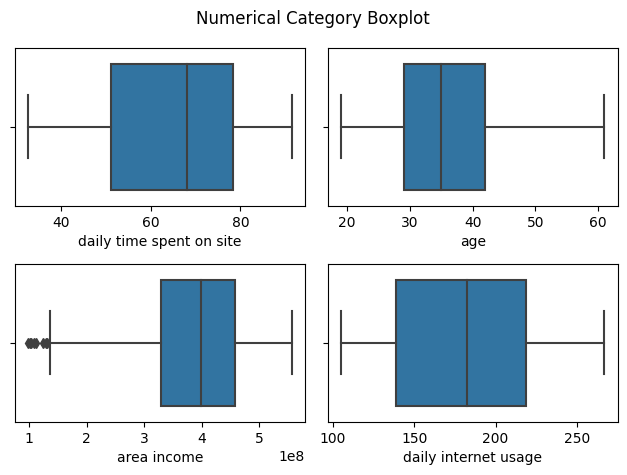

In [ ]:
#cek outlier
for i in range(0,len(num1)):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=df1[num1[i]])
  plt.tight_layout()
  plt.suptitle('Numerical Category Boxplot')

####Kategorikal

In [ ]:
kat.describe().T

,count,unique,top,freq
gender,997,2,Perempuan,518
clicked on ad,997,2,Yes,499
city,997,30,Surabaya,64
province,997,16,Daerah Khusus Ibukota Jakarta,253
category,997,10,Otomotif,111


In [ ]:
kat.nunique()

gender            2
clicked on ad     2
city             30
province         16
category         10
dtype: int64

In [ ]:
for i in kat:
  print(i +' '+'Value Counts')
  print(df1[i].value_counts())
  print()

gender Value Counts
Perempuan    518
Laki-Laki    479
Name: gender, dtype: int64

clicked on ad Value Counts
Yes    499
No     498
Name: clicked on ad, dtype: int64

city Value Counts
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                47
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Jakarta Pusat        27
Bogor                27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             20
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

province Value Counts
Daerah Khusus Ibukota Jakarta    253
Jawa Barat 

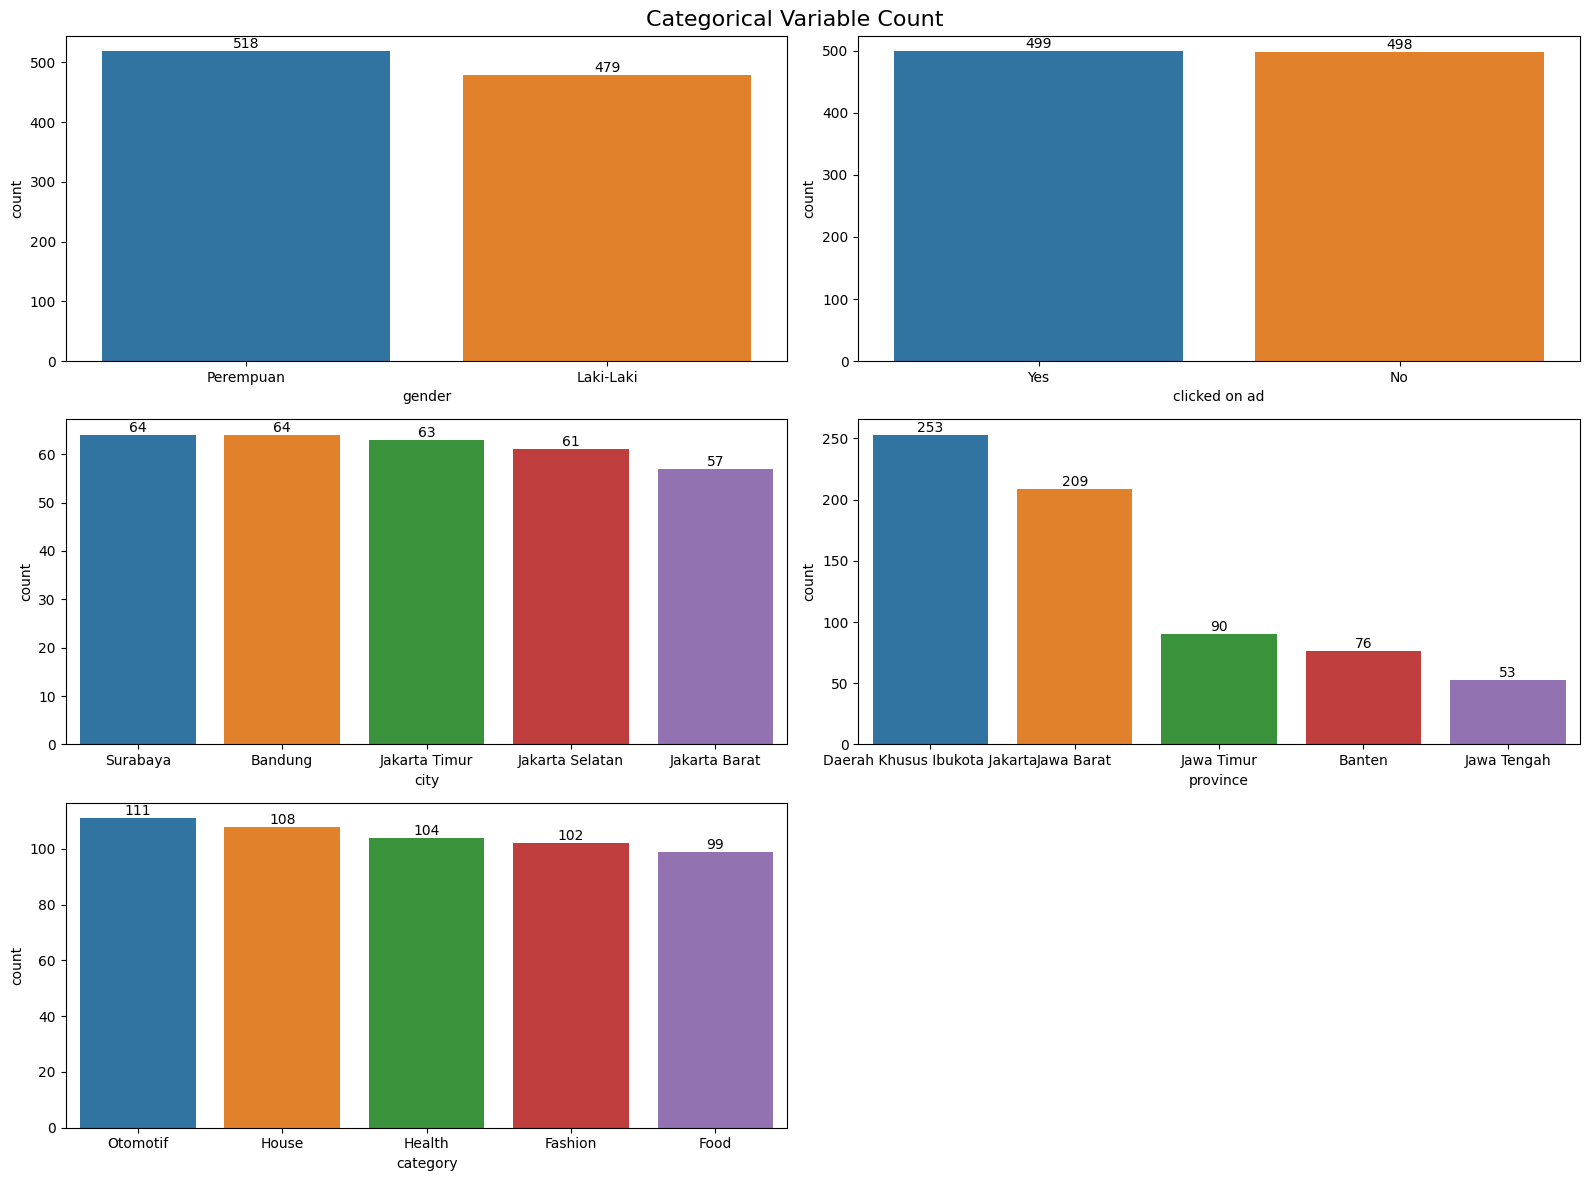

In [ ]:
#kategorikal
plt.figure(figsize=(16,12))
for i in range(0,len(kat1)):
  plt.subplot(3,2,i+1)
  ax = sns.countplot(x=df1[kat1[i]], order=df1[kat1[i]].value_counts().nlargest(5).index)
  plt.tight_layout()
  plt.bar_label(ax.containers[0])
  plt.suptitle('Categorical Variable Count',fontsize=16)

  # plt.savefig('Categorical Variable Count.jpg')
  # files.download('Categorical Variable Count.jpg')

###Bivariate

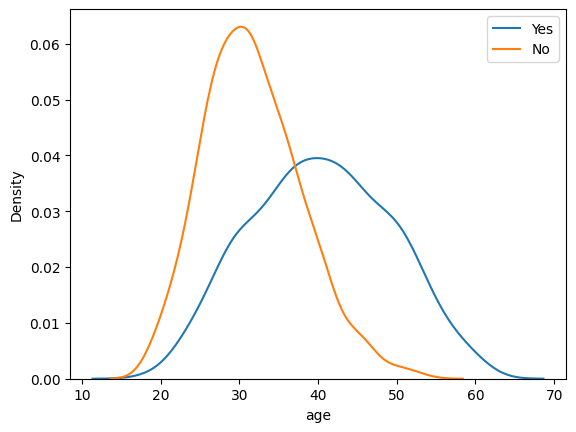

In [ ]:
#Age
sns.kdeplot(df1['age'][df1['clicked on ad']=='Yes'])
sns.kdeplot(df1['age'][df1['clicked on ad']=='No'])
plt.legend(['Yes','No'])

Text(0.5, 1.0, 'Age vs Clicked on Ad')

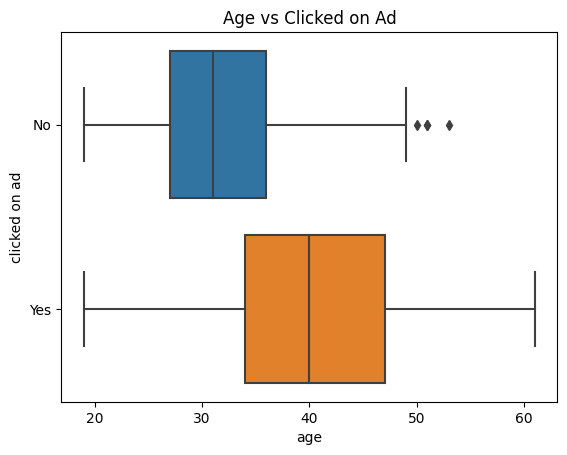

In [ ]:
sns.boxplot(data=df1,x=df1['age'],y=df1['clicked on ad'])
plt.title('Age vs Clicked on Ad')


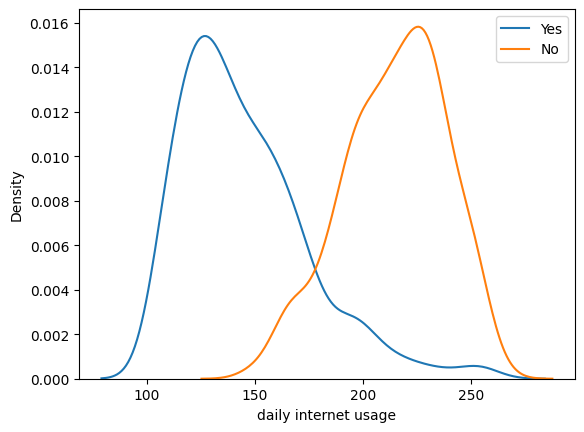

In [ ]:
#Daily Internet Usage
sns.kdeplot(df1['daily internet usage'][df1['clicked on ad']=='Yes'])
sns.kdeplot(df1['daily internet usage'][df1['clicked on ad']=='No'])
plt.legend(['Yes','No'])

Text(0.5, 1.0, 'Daily Internet Usage vs Clicked on Ad')

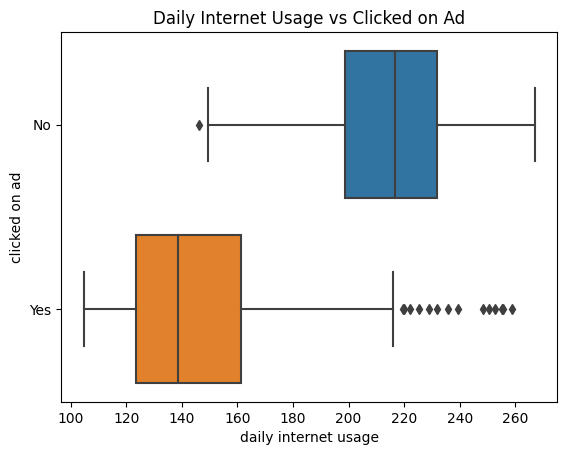

In [ ]:
sns.boxplot(data=df1,x=df1['daily internet usage'],y=df1['clicked on ad'])
plt.title('Daily Internet Usage vs Clicked on Ad')

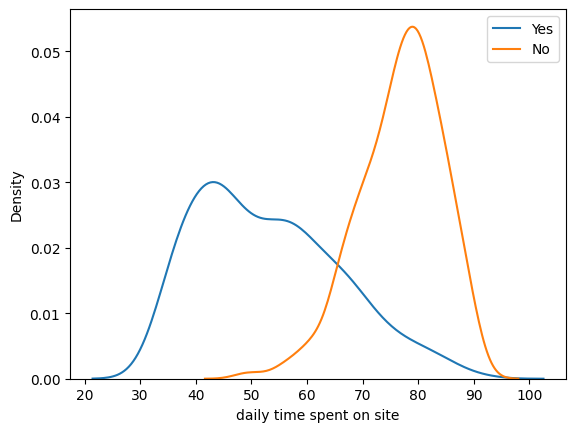

In [ ]:
#Daily Time Spent on Site
sns.kdeplot(df1['daily time spent on site'][df1['clicked on ad']=='Yes'])
sns.kdeplot(df1['daily time spent on site'][df1['clicked on ad']=='No'])
plt.legend(['Yes','No'])

Text(0.5, 1.0, 'Daily Time Spent On Site vs Clicked on Ad')

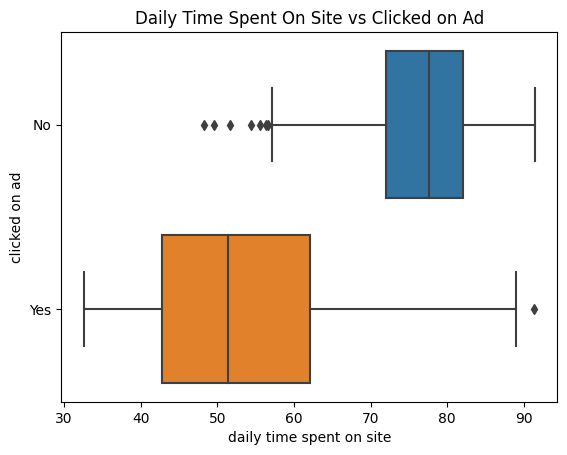

In [ ]:
sns.boxplot(data=df1,x=df1['daily time spent on site'],y=df1['clicked on ad'])
plt.title('Daily Time Spent On Site vs Clicked on Ad')

Text(0.5, 1.0, 'Heatmap Correlation')

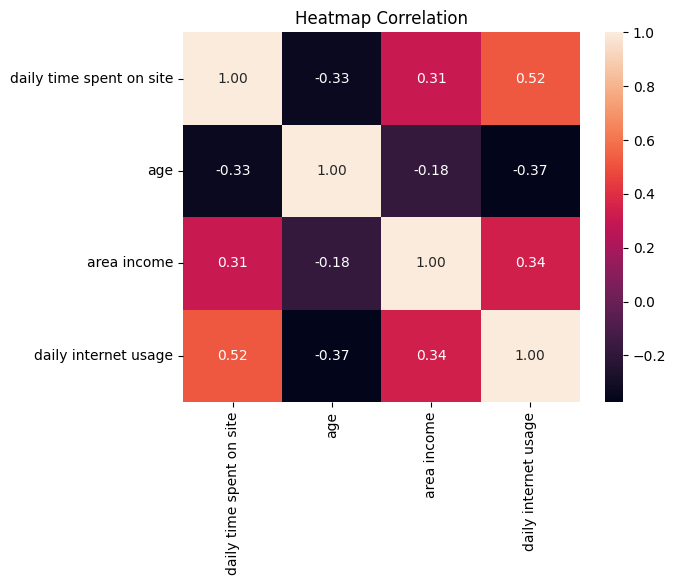

In [ ]:
sns.heatmap(num.corr(),annot=True,fmt='.2f')
plt.title('Heatmap Correlation')

# plt.savefig('heatmap_minpro4.jpg')
# files.download('heatmap_minpro4.jpg')

#Preprocessing + Modelling

In [ ]:
df2 = df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   daily time spent on site  984 non-null    float64       
 1   age                       997 non-null    int64         
 2   area income               985 non-null    float64       
 3   daily internet usage      986 non-null    float64       
 4   gender                    997 non-null    object        
 5   timestamp                 997 non-null    datetime64[ns]
 6   clicked on ad             997 non-null    object        
 7   city                      997 non-null    object        
 8   province                  997 non-null    object        
 9   category                  997 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 85.7+ KB


###Define Target  
Tujuan machine learning ini adalah memprediksi apakah customer akan mengklik ads, oleh sebab itu targetnya ialah fitur **'clicked on ad'**

In [ ]:
#Target
target = {
    'Yes' : 1,
    'No' : 0
}
df2['clicked on ad'] = df2['clicked on ad'].replace(target)
df2.rename(columns={'clicked on ad':'target'},inplace=True)

###Feature Engineering  

Terdapat fitur yang harus diolah dan dijadikan fitur baru yaitu timestamp. Hal tersebut karena fitur masih berupa datetime.

In [ ]:
df2['timestamp'].describe()

<ipython-input-38-e74fe758c3e2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2['timestamp'].describe()


count                     997
unique                    994
top       2016-05-26 15:40:00
freq                        2
first     2016-01-01 02:52:00
last      2016-07-24 00:22:00
Name: timestamp, dtype: object

Kita akan mengekstrak tanggal dan bulan tanpa perlu mengesktrak tahun karena semua data adalah data pada tahun 2016. Selain itu juga kita akan merubah tanggal dan bulan menjadi data kategorikal karena kedua fitur tersebut bersifat diskret bukan ordinal.

In [ ]:
#merubah kolom datetime menjadi hari ke-n dalam satu minggu dan bulan ke-n dalam satu tahun
df2['dayofweek'] = df2['timestamp'].dt.dayofweek
df2['dayofweek'] = 'day' + ' ' + df2['dayofweek'].astype(str)

df2['month'] = df2['timestamp'].dt.month
df2['month'] = 'month' + ' ' + df2['month'].astype(str)

df2 = df2.drop(columns=['timestamp'],axis=1)

###Hypotesis Testing
Karena target berupa kategorikal nominal (yes/no) maka kita akan melakukan feature selection dengan anova untuk kolom numerikal dan chi squared untuk kolom kategorikal

In [ ]:
df2_test = df2.copy() #--> tujuannya ini nanti diisi data median dlu karena testing gaboleh ada nilai null
df2_test.isna().mean()[df2_test.isna().mean()>0]

daily time spent on site    0.013039
area income                 0.012036
daily internet usage        0.011033
dtype: float64

In [ ]:
fill_median = ['daily time spent on site','area income','daily internet usage']
df2_test = df2_test.fillna(df2[fill_median].median())

In [ ]:
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency

In [ ]:
kat = df2_test.select_dtypes(include=['object'])
num = df2_test.select_dtypes(exclude=['object'])

In [ ]:
kat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     997 non-null    object
 1   city       997 non-null    object
 2   province   997 non-null    object
 3   category   997 non-null    object
 4   dayofweek  997 non-null    object
 5   month      997 non-null    object
dtypes: object(6)
memory usage: 54.5+ KB


In [ ]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily time spent on site  997 non-null    float64
 1   age                       997 non-null    int64  
 2   area income               997 non-null    float64
 3   daily internet usage      997 non-null    float64
 4   target                    997 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 46.7 KB


#####Chi Squared

In [ ]:
chi2 = {}

for column in kat:
  chi,p,dof,ex = chi2_contingency(pd.crosstab(df2_test['target'],kat[column]))
  chi2.setdefault('Feature',[]).append(column)
  chi2.setdefault('p value',[]).append(round(p,10))

chi2_result = pd.DataFrame(data=chi2)
chi2_result.sort_values(by=['p value'],ascending=True,ignore_index=True,inplace=True)
chi2_result

,Feature,p value
0,city,0.209645
1,gender,0.296170
2,province,0.382134
3,dayofweek,0.686526
4,category,0.695518
5,month,0.903903


H0 = dependen  
Dengan P value > 0.05, H0 dapat ditolak sehingga menunjukkan bahwa fitur-fitur kategorikal bersifat independen dari target sehingga kita tidak akan menggunakan seluruh fitur kategorikal

#####Anova

In [ ]:
F_statistic, p_value = f_classif(num,df2_test['target'])

anova_table = pd.DataFrame(data={'numerical features':num.columns.values, 'F-Score':F_statistic, 'P value':p_value.round(decimals=10)})
anova_table.sort_values(by=['F-Score'],ascending=False,ignore_index=True,inplace=True)
anova_table

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,numerical features,F-Score,P value
0,target,inf,0.0
1,daily internet usage,1606.555090,0.0
2,daily time spent on site,1214.112641,0.0
3,age,321.027606,0.0
4,area income,290.021803,0.0


In [ ]:
#dropping unnecesary columns
# df2 = df2.drop(columns=['city'],axis=1)

###Split test and train

In [ ]:
df2 = df2.select_dtypes(exclude=['object'])

####Split

In [ ]:
#Pisahkan X dan y
X = df2.drop(columns=['target'],axis=1)
y = df2['target']

In [ ]:
y.value_counts()

1    499
0    498
Name: target, dtype: int64

In [ ]:
#Split train test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.2,stratify=y)

###Pipeline  

Terdapat beberapa fitur numerikal yang memiliki nilai null, akan tetapi karena presentasi nullnya kecil (1.1%-1.3%) kita akan menggunakan median untuk mengisi nilai null tersebut.

In [ ]:
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, confusion_matrix

#####Cek duplikat dan missing values

In [ ]:
X_train.duplicated().sum()

0

In [ ]:
(X_train.isna().mean()[X_train.isna().mean()>0])*100

daily time spent on site    1.254705
area income                 1.003764
daily internet usage        1.129235
dtype: float64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 807 to 845
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily time spent on site  787 non-null    float64
 1   age                       797 non-null    int64  
 2   area income               789 non-null    float64
 3   daily internet usage      788 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.1 KB


####Preprocess + Modelling


In [ ]:
numerik = ['daily time spent on site','age','area income','daily internet usage']

In [ ]:
#preprocessing
numerik_transform = make_pipeline(
    SimpleImputer(strategy='median')
)
preprocessor = make_column_transformer(
    (numerik_transform, numerik)
)

In [ ]:
#modelling
model1 = RandomForestClassifier(random_state=20)
model2 = GradientBoostingClassifier(random_state=20)
model3 = xgb.XGBClassifier(random_state=20)

In [ ]:
#pipeline
pipe1 = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',model1)
])

pipe2 = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',model2)
])

pipe3 = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',model3)
])

In [ ]:
#evaluation metrics
def eval_classification(pipe):
  pipe.fit(X_train, y_train)

  y_pred = pipe.predict(X_test)
  y_pred_train = pipe.predict(X_train)
  y_pred_proba = pipe.predict_proba(X_test)
  y_pred_proba_train = pipe.predict_proba(X_train)

  acc = accuracy_score(y_test, y_pred)
  acc_train = accuracy_score(y_train, y_pred_train)
  prec = precision_score(y_test, y_pred)
  prec_train = precision_score(y_train, y_pred_train)
  rec = recall_score(y_test, y_pred)
  rec_train = recall_score(y_train, y_pred_train)
  roc = roc_auc_score(y_test, y_pred_proba[:,1])
  roc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])

  cv = KFold(random_state=20,shuffle=True)
  score = cross_val_score(pipe,X,y,scoring='accuracy',cv=cv)
  ACC = np.mean(score)

  results = {
      'Accuracy (Test)': acc,
      'Accuracy (Train)': acc_train,
      'Precision (Test)': prec,
      'Precision (Train)': prec_train,
      'Recall (Test)': rec,
      'Recall (Train)': rec_train,
      'Roc (Test)': roc,
      'Roc (Train)': roc_train,
      'Accuracy (Crossval)': ACC
  }
  return results


In [ ]:
pipe_list = [pipe1,pipe2,pipe3]
results_list = []
for pipe in pipe_list:
  result = eval_classification(pipe)
  results_list.append(result)

In [ ]:
df_result = pd.DataFrame(results_list,index=['Random Forest',
                                             'Gradient Boosting',
                                             'Xgboost'])
df_result

,Accuracy (Test),Accuracy (Train),Precision (Test),Precision (Train),Recall (Test),Recall (Train),Roc (Test),Roc (Train),Accuracy (Crossval)
Random Forest,0.955,1.000000,0.950495,1.0,0.96,1.000000,0.99305,1.0,0.959864
Gradient Boosting,0.955,0.998745,0.959596,1.0,0.95,0.997494,0.98970,1.0,0.960854
Xgboost,0.960,1.000000,0.969388,1.0,0.95,1.000000,0.99210,1.0,0.959854


Karena target terdistribusi secara balance, maka metriks yang akan digunakan untuk mengevaluasi model adalah accuracy.Berdasarkan hasil pada tabel diatas, dapat dilihat bahwa **XGBoost** menghasilkan model yang paling baik dengan **nilai accuracy tertinggi**.  

Selain itu kita ingin berfokus pada nilai **precision** untuk meminimalisir false positive. False positive disini artinya adalah orang yang tidak mengklik ads tapi terdeteksi / terprediksi mengklik ads. false negative artinya dalah orang yang mengklik ads tapi terdeteksi tidak mengklik ads.   

Perusahaan tidak ingin spend budget lebih untuk orang yang tidak tertarik terhadap produk/layanan.

In [ ]:
#confusion matrix xgboost / model3

y_pred_model3 = pipe3.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred_model3,labels=[0,1]) #tp,fp,fn,tn kalo labelnya gini
cf_matrix

array([[97,  3],
       [ 5, 95]])

Text(0.5, 1.0, 'Clicked on Ad')

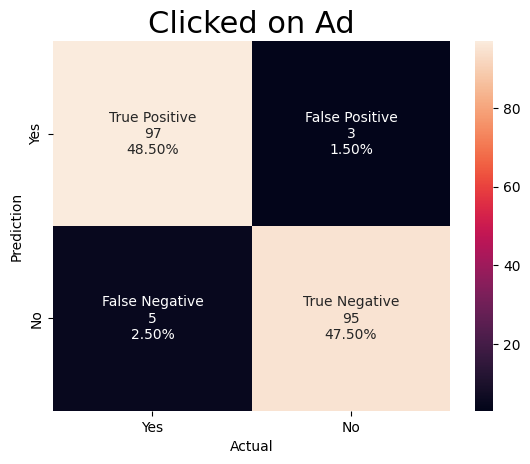

In [ ]:
group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Clicked on Ad',fontsize=22)

Text(0.5, 1.0, 'Feature Importance')

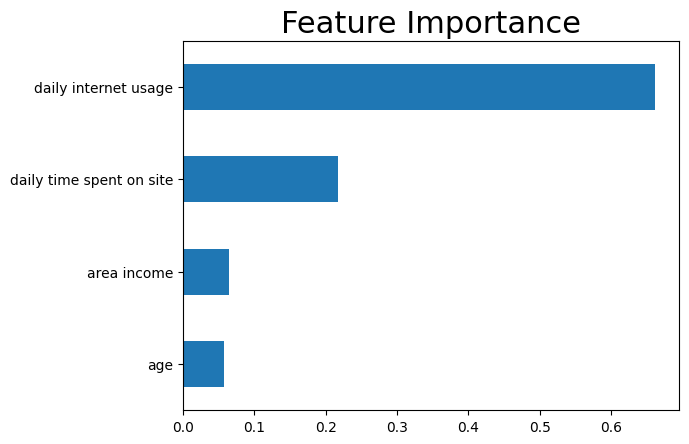

In [ ]:
#feature importance
f_importance = pd.Series(model3.feature_importances_,index=X.columns)
ax = f_importance.nlargest().plot(kind='barh')
ax.invert_yaxis()
plt.title('Feature Importance',fontsize=22)

Berdasarkan hasil feature importance, daily internet usage menjadi fitur yang paling menentukan apakah seorang customer akan mengklik ads atau tidak.  
Faktor tersebut didukung dengan hasil dari EDA yang menunjukkan bahwa customer yang mengklik ads adalah customer yang lebih sedikit menggunakan internet perharinya.
Hal ini dapat dimungkinkan terjadi karena customer yang lebih jarang untuk menggunakan internet tidak akan dapat untuk memilih-milih dan membandingkan satu platform dengan platform lainnya, sehingga begitu ada ads yang menarik tentu akan diklik tanpa perlu melakukan pebandingan dengan produk di tempat lain


#Simulasi Bisnis

In [ ]:
#data original
y_test.value_counts()

1    100
0    100
Name: target, dtype: int64

Text(0.5, 1.0, 'Clicked on Ad')

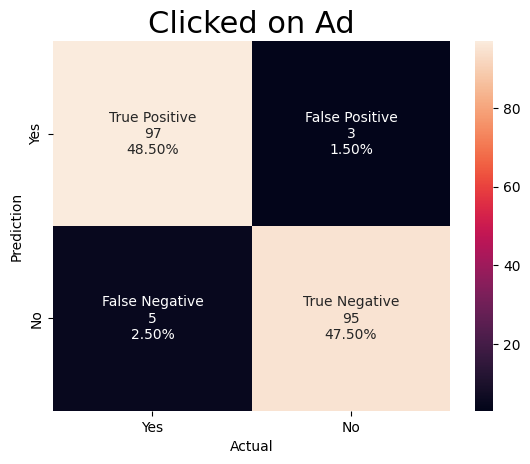

In [ ]:
#hasil setelah machine learning
sns.heatmap(cf_matrix, annot=labels, fmt='',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Clicked on Ad',fontsize=22)

##Perhitungan Simulasi Bisnis

Berdasarkan smallbusiness.chron.com  :
"In planning a startup, a rule of thumb holds that 4 dollar in revenues should be received for every 1 dollar spent on marketing and advertising."  
  
Sehingga dengan asumsi menggunakan metriks cost per impression, kita dapat asumsikan sebagai berikut:
- Biaya per impression = 1 dollar
- Revenue per clicked ads = 4 dollar    

**Sebelum** menggunakan machine learning,  
- Cost = potential cust x biaya per impression  
200 x 1 dollar = 200 dollar
- Revenue = clicked customer x revenye per clicked ads  
100 x 4 dollar = 400 dollar
- Profit = Revenue - Cost
400 dollar - 200 dollar = **200 dollar**

**Sesudah** menggunakan machine learning,
- Cost = potential cust x biaya per impression  
100 x 1 dollar = 100 dollar
- Revenue = clicked customer x revenye per clicked ads  
97 x 4 dollar = 388 dollar
- Profit = Revenue - Cost
388 dollar - 102 dollar = **288 dollar**

Dengan menggunakan machine learning,  
terdapat potensi untuk meningkatkan keuntungan karena ads dapat ditargetkan kepada potensial customer yang kemungkinan akan mengklik ads
